In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

x = np.uint8([250])
y = np.uint8([10])

print(cv2.add(x,y))
print(x+y)

[[255]]
[4]


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def nothing(x):
    pass

cv2.namedWindow('image')

img1 = cv2.imread('b.png')
img2 = cv2.imread('opencv_logo.png')


cv2.createTrackbar('alpha_1','image',0,255,nothing)
cv2.createTrackbar('alpha_2','image',0,255,nothing)

wait = True
while(wait):
    alpha_1 = cv2.getTrackbarPos('alpha_1','image')
    alpha_2 = cv2.getTrackbarPos('alpha_2','image')
    dst = cv2.addWeighted(img1,alpha_1/100,img2,alpha_2/100,0)
    cv2.imshow('image',dst)

    wait = cv2.waitKey()=='q113'

cv2.destroyAllWindows()

: 

: 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img1 = cv2.imread('opencv_logo.png')
img2 = cv2.imread('b.png')

rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np

drawing = False
mode = True
ix,iy = -1,-1

def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

font = cv2.FONT_HERSHEY_SIMPLEX

while(1):
    dsp = img.copy()
    cv2.putText(dsp, "OpenCV"+str(ix)+",  "+str(iy), (10, 40), font, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('image',dsp)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()



In [3]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])

    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

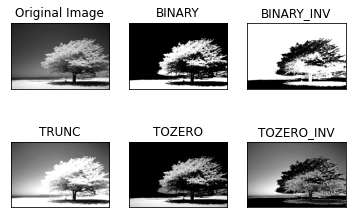

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('tree.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

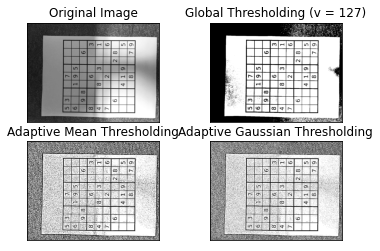

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('1.jpg',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

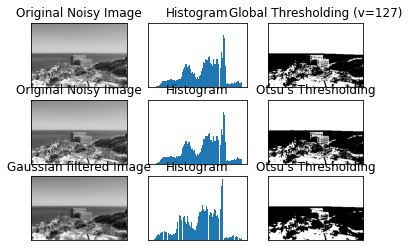

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('a.jpeg',0)
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)', 'Original Noisy Image','Histogram',"Otsu's Thresholding", 'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [23]:
from re import I
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('a.jpeg',0)
blur = cv2.GaussianBlur(img,(5,5),0)

hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i])
    q1,q2 = Q[i],Q[255]-Q[i]
    b1,b2 = np.hsplit(bins,[i])
    
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = I

ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh,ret)

re.IGNORECASE 136.0


/var/folders/p_/6nkb_tn501j4035x_pzks8sm0000gn/T/ipykernel_47423/1146023642.py:23: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
/var/folders/p_/6nkb_tn501j4035x_pzks8sm0000gn/T/ipykernel_47423/1146023642.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
/var/folders/p_/6nkb_tn501j4035x_pzks8sm0000gn/T/ipykernel_47423/1146023642.py:26: RuntimeWarning: invalid value encountered in double_scalars
  fn = v1*q1 + v2*q2
